# Estación Casa de Campo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_27.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,43.258065
2013-02-01,32.354839
2013-03-01,26.612903
2013-04-01,22.322581
2013-05-01,21.870968


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

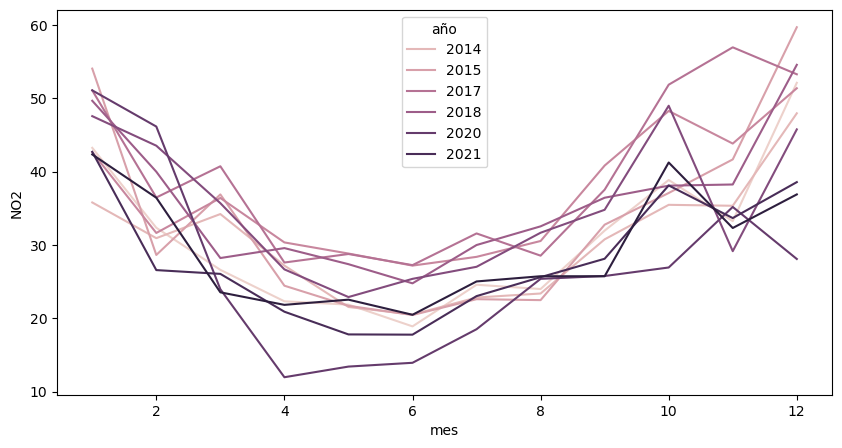

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

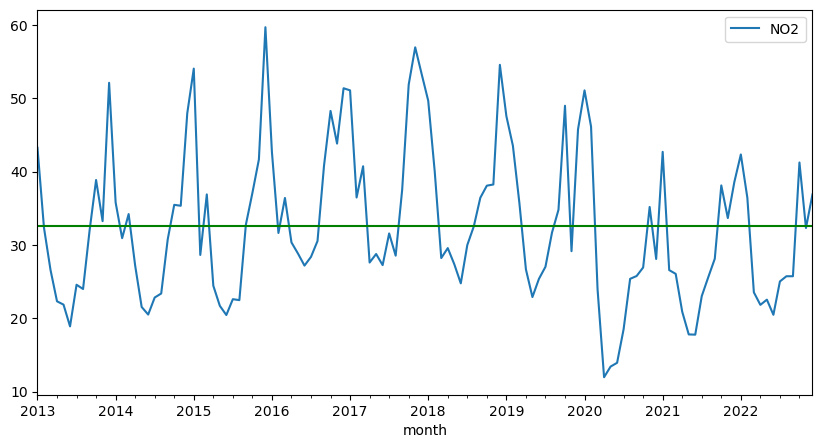

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

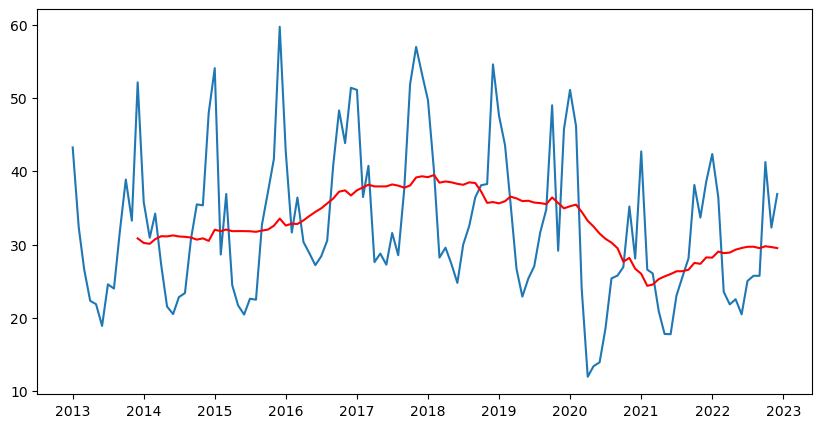

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,43.258065
2013-02-01,32.354839
2013-03-01,26.612903
2013-04-01,22.322581
2013-05-01,21.870968


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,43.258065,2013,1
2013-02-01,32.354839,2013,2
2013-03-01,26.612903,2013,3
2013-04-01,22.322581,2013,4
2013-05-01,21.870968,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,43.258065,2013,1
2013-02-01,32.354839,2013,2
2013-03-01,26.612903,2013,3
2013-04-01,22.322581,2013,4
2013-05-01,21.870968,2013,5


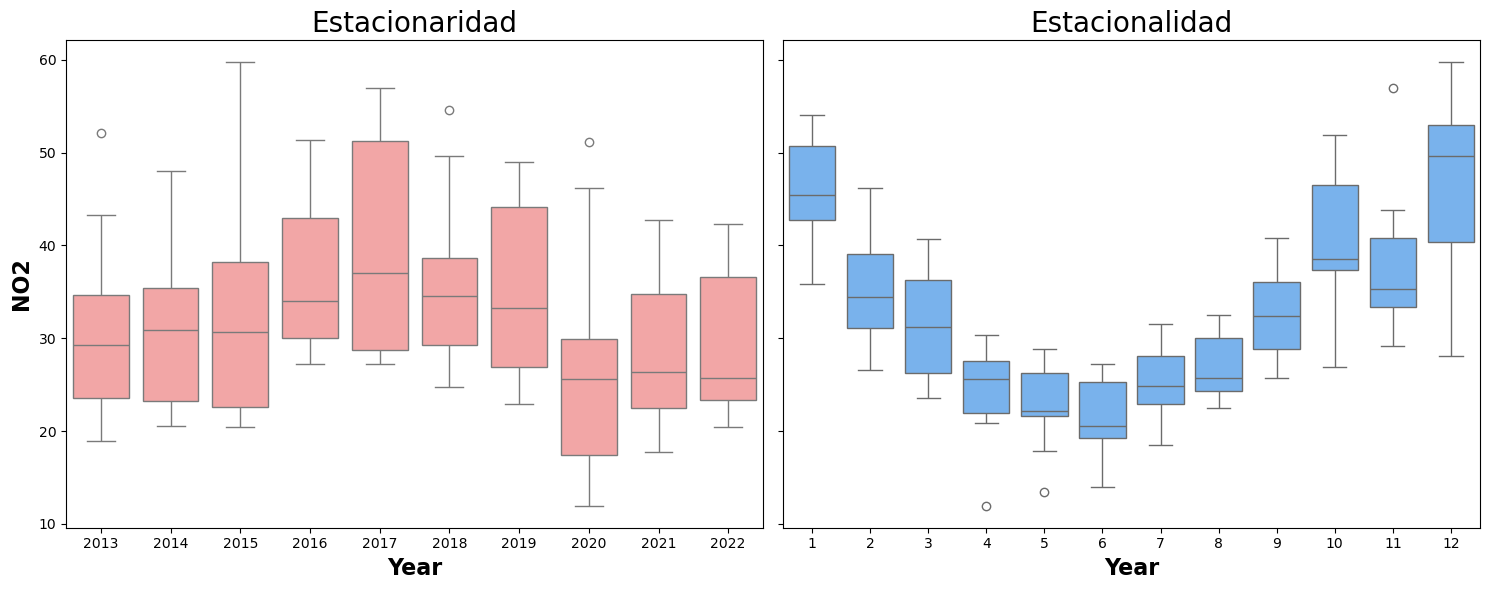

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-1.0722047771386478,
 0.7260281070405814,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 692.4386498573324)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.0722047771386478
p-value 0.7260281070405814
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999998
1 mes Lag, 0.6771867546545338
2 mes Lag, 0.43379990563087883
3 mes Lag, 0.13432150011583646
4 mes Lag, -0.19079451280934046
5 mes Lag, -0.39613785564073867
6 mes Lag, -0.4599097795100386
7 mes Lag, -0.4146275803754254
8 mes Lag, -0.21757189998904589
9 mes Lag, 0.112026290310071
10 mes Lag, 0.39373520528386735
11 mes Lag, 0.6240655649123515
12 mes Lag, 0.7658816966600904
13 mes Lag, 0.6470738661128377
14 mes Lag, 0.3565838922998563
15 mes Lag, 0.08809127377197506
16 mes Lag, -0.28195200386199903
17 mes Lag, -0.4655191459461366
18 mes Lag, -0.5338577811429049
19 mes Lag, -0.4844241589257451
20 mes Lag, -0.28500874895166484
21 mes Lag, 0.04471656345358755
22 mes Lag, 0.2925323616503628
23 mes Lag, 0.5552936237816182
24 mes Lag, 0.6963963296201762
25 mes Lag, 0.5248979577555669
26 mes Lag, 0.2881163927147249
27 mes Lag, -0.022210211037842716
28 mes Lag, -0.3612643501648965
29 mes Lag, -0.6001236942791536
30 mes Lag, -0.6842138815996929
31 mes Lag, -0.582212432

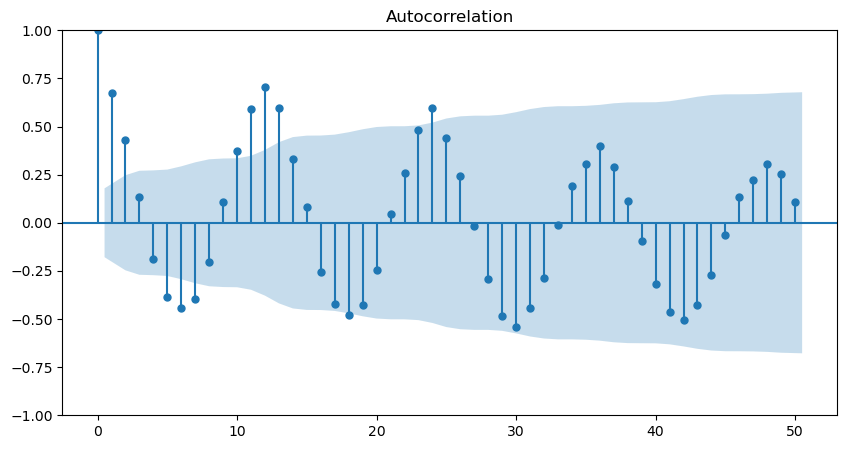

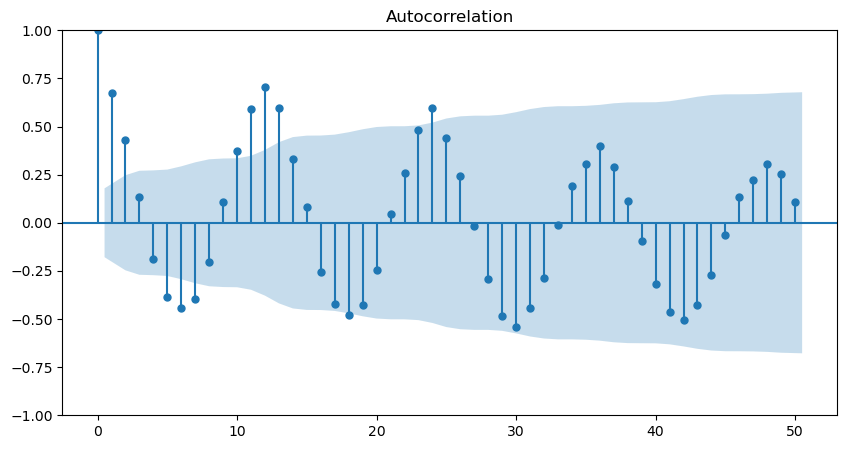

In [19]:
plot_acf(df, lags = 50)

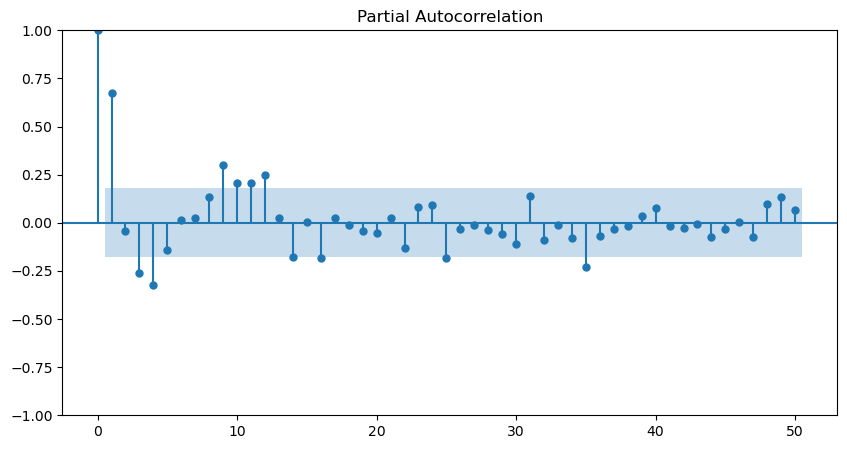

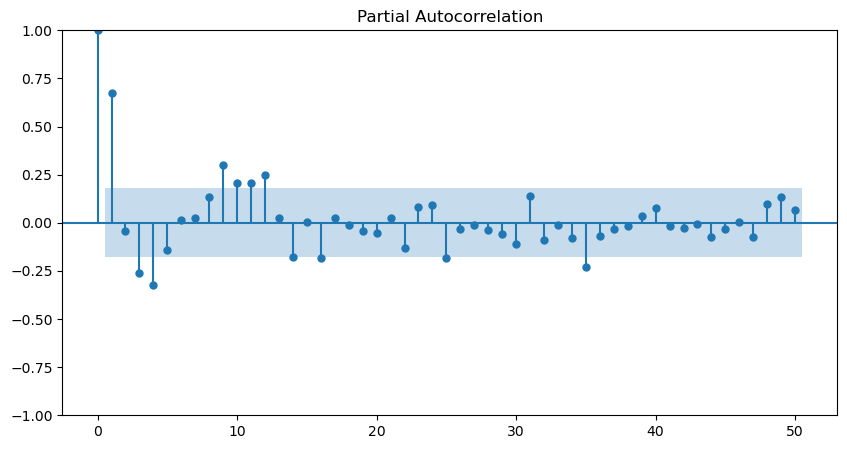

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,43.258065
2013-02-01,32.354839
2013-03-01,26.612903
2013-04-01,22.322581
2013-05-01,21.870968


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████▎   | 15/24 [00:00<00:00, 21.98it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 219 ms
Wall time: 1.29 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
8,8.301251,"(1, 1, 2)"
9,9.307516,"(1, 2, 0)"
3,10.115447,"(0, 2, 0)"
14,13.346871,"(2, 1, 2)"
20,14.509103,"(3, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(1, 1, 2),  # modelo arima
               seasonal_order=(1, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  6.439392827539852
CPU times: total: 125 ms
Wall time: 230 ms


,real,pred,error
2020-07-01,18.516129,24.252622,5.736493
2020-08-01,25.387097,29.554439,4.167342
2020-09-01,25.774194,35.342683,9.568489
2020-10-01,26.935484,44.997565,18.062081
2020-11-01,35.193548,36.686452,1.492904
2020-12-01,28.096774,50.274607,22.177833
2021-01-01,42.709677,49.474420,6.764743
2021-02-01,26.580645,43.200330,16.619684
2021-03-01,26.064516,29.865318,3.800802
2021-04-01,20.903226,20.543388,-0.359838


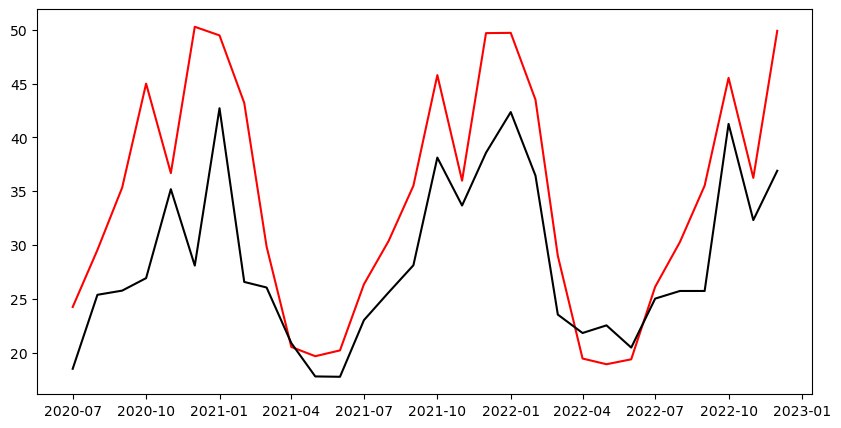

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,49.627248
2023-02-01,43.397971
2023-03-01,29.308336
2023-04-01,19.849012
2023-05-01,19.202968
2023-06-01,19.689650
2023-07-01,26.212036
2023-08-01,30.322520
2023-09-01,35.518344
2023-10-01,45.622544


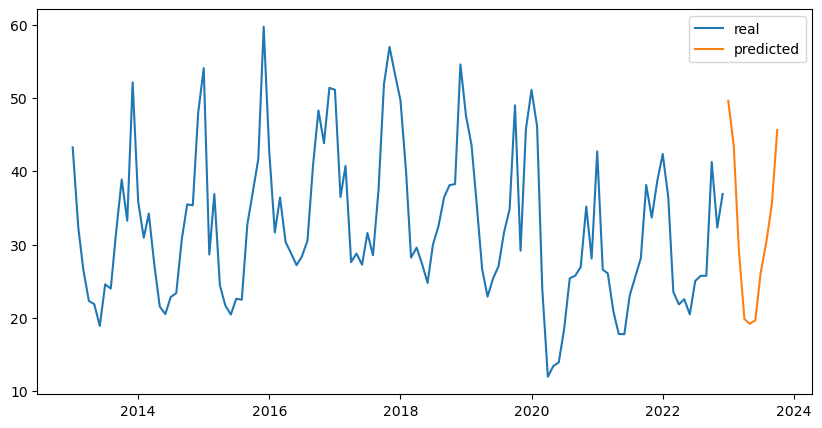

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,49.627248
2023-02-01,43.397971
2023-03-01,29.308336
2023-04-01,19.849012
2023-05-01,19.202968
2023-06-01,19.689650
2023-07-01,26.212036
2023-08-01,30.322520
2023-09-01,35.518344
2023-10-01,45.622544


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
df_27_23 = df23[df23["ESTACION"] == 27]
df_27_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
69,69,27,2023,1,35.258065
70,70,27,2023,2,40.516129
71,71,27,2023,3,31.741935
72,72,27,2023,4,27.225806
73,73,27,2023,5,21.903226
74,74,27,2023,6,25.806452
75,75,27,2023,7,28.612903
76,76,27,2023,8,27.870968
77,77,27,2023,9,35.225806
78,78,27,2023,10,37.129032


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(df_27_23)

,Unnamed: 0,NO2
month,,
2023-01-01,69,35.258065
2023-02-01,70,40.516129
2023-03-01,71,31.741935
2023-04-01,72,27.225806
2023-05-01,73,21.903226
2023-06-01,74,25.806452
2023-07-01,75,28.612903
2023-08-01,76,27.870968
2023-09-01,77,35.225806


In [39]:
df_27_23.drop("Unnamed: 0", axis=1, inplace=True)

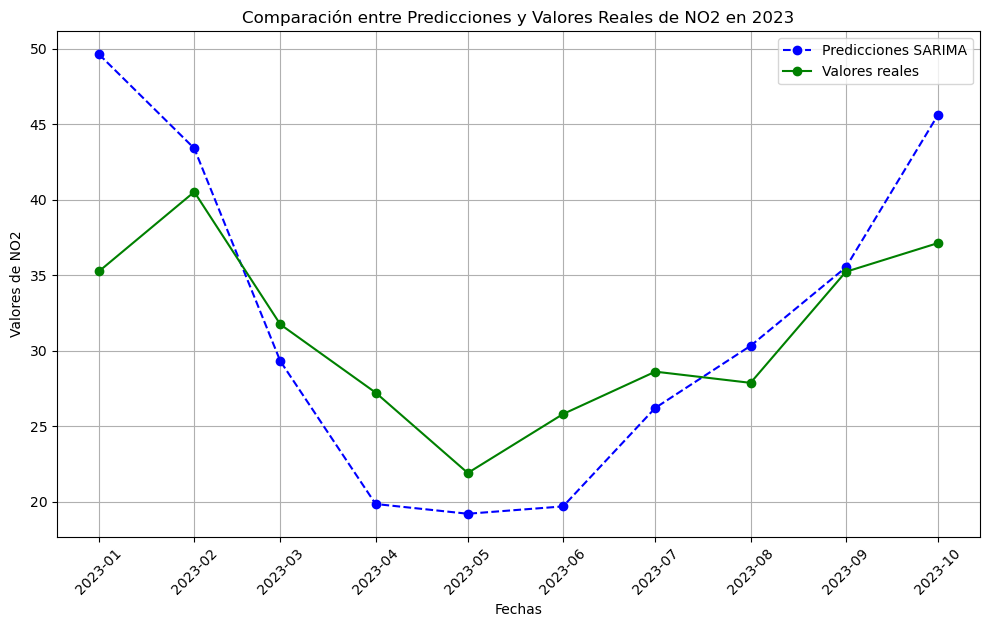

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
df_27_23.index = pd.to_datetime(df_27_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_27_23['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [42]:
pred_año["predicted_mean"]
df_27_23["NO2"]

month
2023-01-01    35.258065
2023-02-01    40.516129
2023-03-01    31.741935
2023-04-01    27.225806
2023-05-01    21.903226
2023-06-01    25.806452
2023-07-01    28.612903
2023-08-01    27.870968
2023-09-01    35.225806
2023-10-01    37.129032
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [43]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,49.627248
2023-02-01,43.397971
2023-03-01,29.308336
2023-04-01,19.849012
2023-05-01,19.202968
2023-06-01,19.689650
2023-07-01,26.212036
2023-08-01,30.322520
2023-09-01,35.518344
2023-10-01,45.622544


In [46]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [df_27_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,35.258065
2023-02-01,40.516129
2023-03-01,31.741935
2023-04-01,27.225806
2023-05-01,21.903226
2023-06-01,25.806452
2023-07-01,28.612903
2023-08-01,27.870968
2023-09-01,35.225806
2023-10-01,37.129032


In [47]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    33.105277
dtype: float64